In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd
import statsmodels.api as sm
%matplotlib inline

In [6]:
pd.read_csv('calendar_summary.csv')

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN
...,...,...,...,...
8231475,29809357,2018-11-11,f,NaN
8231476,29809357,2018-11-10,f,NaN
8231477,29809357,2018-11-09,f,NaN
8231478,29809357,2018-11-08,f,NaN


In [15]:
calendar=pd.read_csv('calendar_summary.csv')

In [16]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231480 entries, 0 to 8231479
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 251.2+ MB


In [72]:
calendar['date'].value_counts(ascending=False)

2019-11-01    7247
2019-10-24    7247
2019-10-25    7247
2019-10-30    7247
2019-10-27    7247
              ... 
2019-03-10    7245
2018-11-08    7244
2018-11-07    7244
2019-11-07       1
2019-11-08       1
Name: date, Length: 367, dtype: int64

count the 'date' column in descending order, we could see the frequency of booking in a year is pretty normalized. In a 367 days range, there are always around 7244 to 7247 bookings in daily, but only 1 reservation on both 2019-11-07 and 2019-11-08. Since this data is scraped from 2018-11-08 to 2019-11-08, the reason why '1 reservation' happened on 2019-11-07 and 2019-11-08 might be the whole data is not updated consistently during the last two days.  

In [49]:
calendar['available'].value_counts()

f    2004326
t     640191
Name: available, dtype: int64

according to the total count for the columns: 2,644,517 , we can calculate the percentage of true.available is around 24.21%. 

In [76]:
calendar['price'].value_counts(ascending=False)

$50.00     25488
$65.00     23439
$45.00     21932
$55.00     21669
$35.00     21471
           ...  
$555.00        1
$539.00        1
$297.00        1
$597.00        1
$203.00        1
Name: price, Length: 398, dtype: int64

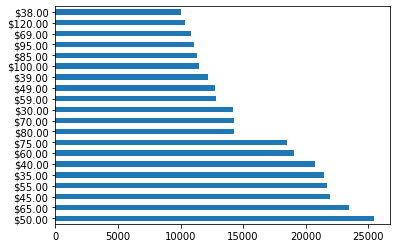

In [77]:
calendar['price'].value_counts(ascending=False)[:20].plot(kind='barh')

List out the price of the order and sort it in descending order of the value counts, we could see the price which the customers usually booked is $50.  
The graph above is taken by the top 20% of the mostly booked price, and we realize the prices from $40-$80 are mostly popular, but price above $80 and less than $120 is also acceptable.   

In [12]:
calendar.describe()

,listing_id
count,2.644518e+06
mean,5.294158e+06
std,3.106355e+06
min,2.015000e+03
25%,2.459679e+06
50%,5.519851e+06
75%,7.852609e+06
max,1.053496e+07


In [13]:
pd.read_csv('/listings.csv')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


In [14]:
listing=pd.read_csv('/listings.csv')

In [15]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   name                            22493 non-null  object 
 2   host_id                         22552 non-null  int64  
 3   host_name                       22526 non-null  object 
 4   neighbourhood_group             22552 non-null  object 
 5   neighbourhood                   22552 non-null  object 
 6   latitude                        22552 non-null  float64
 7   longitude                       22552 non-null  float64
 8   room_type                       22552 non-null  object 
 9   price                           22552 non-null  int64  
 10  minimum_nights                  22552 non-null  int64  
 11  number_of_reviews               22552 non-null  int64  
 12  last_review                     

In [16]:
listing.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


The medium price is $45, so we could realize that most of the customers would incline to search the house at this price range. However, the standard deviation is huge, which is $220, and the max price for the house is $9,000. This indicates that there are still customers looking for a high price airbnb house. The reasons may be the house quality, size and the date of booking. 


In [85]:
listing['name'].value_counts(ascending=False)[:10]


Berlin Wohnung                         14
Cozy room in Berlin                     9
Room in Neukölln                        9
Gemütliches Zimmer in Neukölln          9
Room in Friedrichshain                  8
Cozy room in Friedrichshain             7
Cozy room in Prenzlauer Berg            7
Cosy room in the heart of Kreuzberg     7
Cozy apartment in Kreuzberg             6
Berlin Apartment                        6
Name: name, dtype: int64

In [86]:
listing['neighbourhood'].value_counts(ascending=False)[:10]


Tempelhofer Vorstadt        1325
Frankfurter Allee Süd FK    1282
Alexanderplatz              1091
Reuterstraße                1002
Rixdorf                      880
Neuköllner Mitte/Zentrum     797
Brunnenstr. Süd              773
Frankfurter Allee Nord       735
Schillerpromenade            662
südliche Luisenstadt         643
Name: neighbourhood, dtype: int64

List out the most popular 10 hosting houses and 10 neighbourhoods from the databse. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1b3f6cbe0>,
      dtype=object)

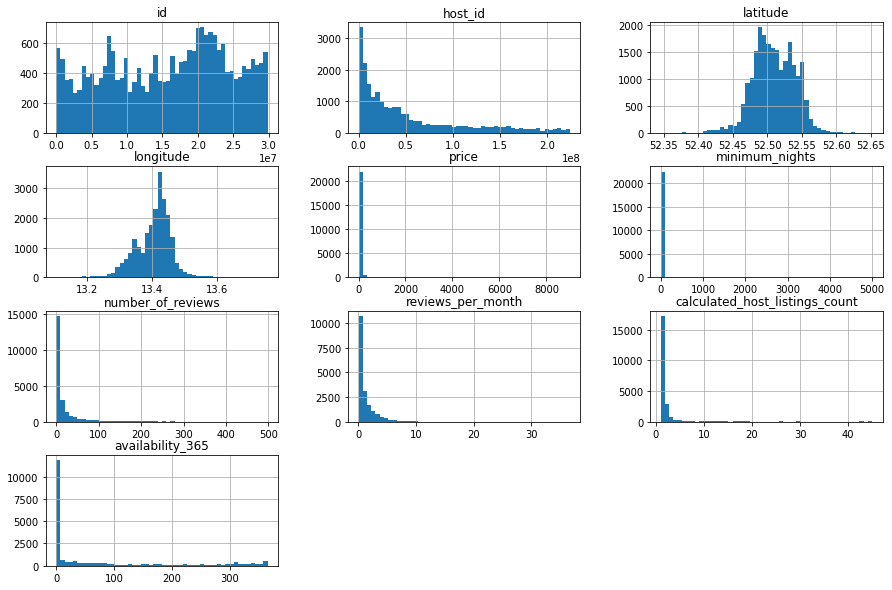

In [17]:
listing.hist(bins=50, figsize=(15,10))

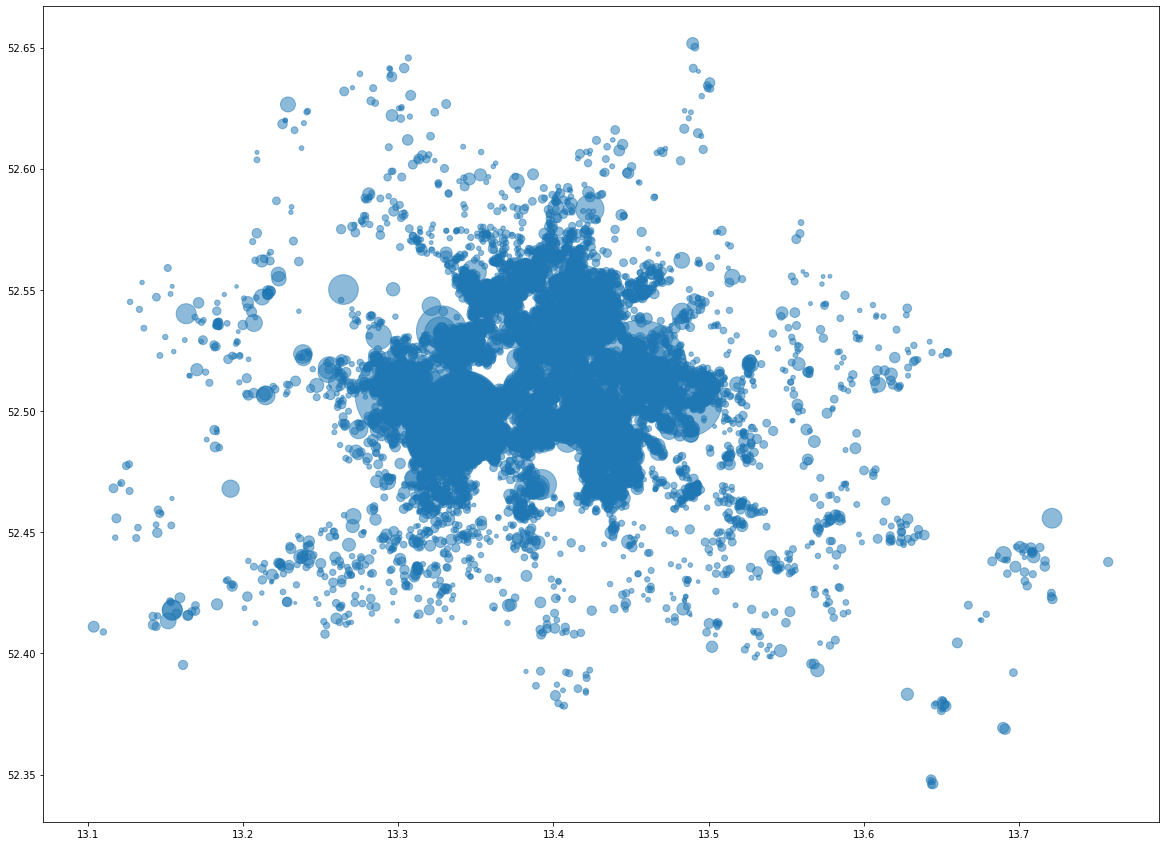

In [81]:
plt.figure(figsize=(20,15))
plt.scatter(x=listing['longitude'], y=listing['latitude'], alpha=0.5, s=listing['price'] )


Plot a graph based on the location and price info, we could see that the more center area, the higher the price. 

In [28]:
list_sum=pd.read_csv('listings_summary.csv')

In [12]:
list_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_url           

In [6]:
list_sum.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.255200e+04,2.255200e+04,0.0,0.0,0.0,2.255200e+04,0.0,22526.000000,22526.000000,22552.000000,...,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,0.0,22552.000000,18638.000000
mean,1.571560e+07,2.018111e+13,NaN,NaN,NaN,5.403355e+07,NaN,2.330685,2.330685,52.509824,...,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,1.918233,1.135525
std,8.552069e+06,4.812607e+00,NaN,NaN,NaN,5.816290e+07,NaN,19.947823,19.947823,0.030825,...,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,NaN,3.667257,1.507082
min,2.015000e+03,2.018111e+13,NaN,NaN,NaN,2.217000e+03,NaN,0.000000,0.000000,52.345803,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,8.065954e+06,2.018111e+13,NaN,NaN,NaN,9.240002e+06,NaN,1.000000,1.000000,52.489065,...,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.180000
50%,1.686638e+07,2.018111e+13,NaN,NaN,NaN,3.126711e+07,NaN,1.000000,1.000000,52.509079,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.540000
75%,2.258393e+07,2.018111e+13,NaN,NaN,NaN,8.067518e+07,NaN,2.000000,2.000000,52.532669,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,2.986735e+07,2.018111e+13,NaN,NaN,NaN,2.245081e+08,NaN,1676.000000,1676.000000,52.651670,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,45.000000,36.670000


In [7]:
corr_matrix = list_sum.corr()
corr_matrix

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
id,1.000000e+00,-2.215820e-13,NaN,NaN,NaN,5.276801e-01,NaN,1.749774e-02,1.749774e-02,6.059620e-03,...,6.795104e-02,3.389235e-02,1.850820e-02,2.601636e-02,2.431180e-02,3.729207e-02,5.182808e-02,NaN,3.824768e-02,2.504754e-01
scrape_id,-2.215820e-13,1.000000e+00,NaN,NaN,NaN,1.430780e-13,NaN,3.643409e-15,3.643409e-15,4.103877e-12,...,8.172484e-15,-8.520373e-15,2.913634e-15,-4.081258e-15,1.530393e-15,8.316242e-15,-2.901880e-15,NaN,2.191725e-15,-6.474074e-16
thumbnail_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,5.276801e-01,1.430780e-13,NaN,NaN,NaN,1.000000e+00,NaN,1.532900e-03,1.532900e-03,7.229661e-03,...,-2.550869e-02,-2.964861e-02,-2.869074e-02,-1.823267e-02,-3.415284e-02,-2.617821e-02,-1.570989e-02,NaN,-4.857026e-02,2.033678e-01
host_acceptance_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,1.749774e-02,3.643409e-15,NaN,NaN,NaN,1.532900e-03,NaN,1.000000e+00,1.000000e+00,-1.542931e-02,...,-1.277510e-01,-1.230016e-01,-4.387793e-02,-9.607218e-02,-1.249543e-01,-1.089033e-01,-1.401103e-01,NaN,2.074182e-01,9.239810e-02
host_total_listings_count,1.749774e-02,3.643409e-15,NaN,NaN,NaN,1.532900e-03,NaN,1.000000e+00,1.000000e+00,-1.542931e-02,...,-1.277510e-01,-1.230016e-01,-4.387793e-02,-9.607218e-02,-1.249543e-01,-1.089033e-01,-1.401103e-01,NaN,2.074182e-01,9.239810e-02
latitude,6.059620e-03,4.103877e-12,NaN,NaN,NaN,7.229661e-03,NaN,-1.542931e-02,-1.542931e-02,1.000000e+00,...,-1.643548e-02,-2.986526e-03,3.905748e-03,-1.962496e-02,-7.939688e-03,2.556224e-03,-1.037191e-02,NaN,3.978455e-02,4.259373e-02


In [42]:
#since the 'price' column is object, couldn't do the correlation analysis, we need to transfer the data type from object to float
list_sum['price']=(list_sum['price'].replace( '[\$,)]','', regex=True )
                  .replace( '[(]','-',   regex=True ).astype(float))
#list_sum['bedrooms'] = list_sum['bedrooms'].astype(str)


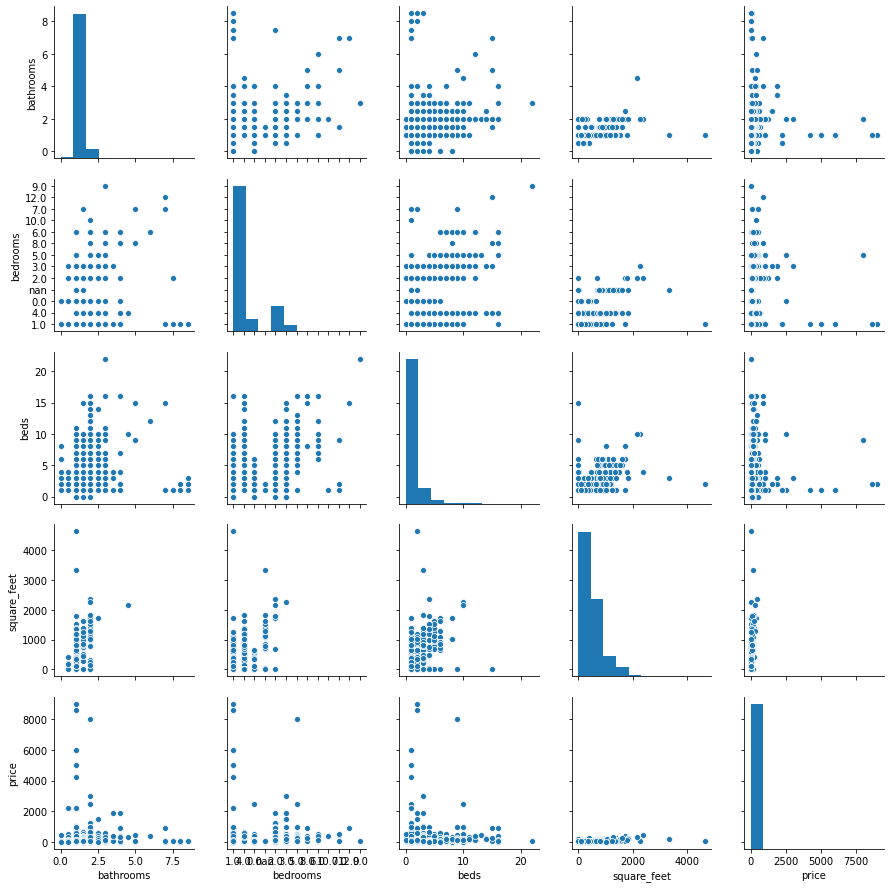

In [26]:
sns.pairplot(list_sum[['bathrooms', 'bedrooms', 'beds', 'square_feet','price']])

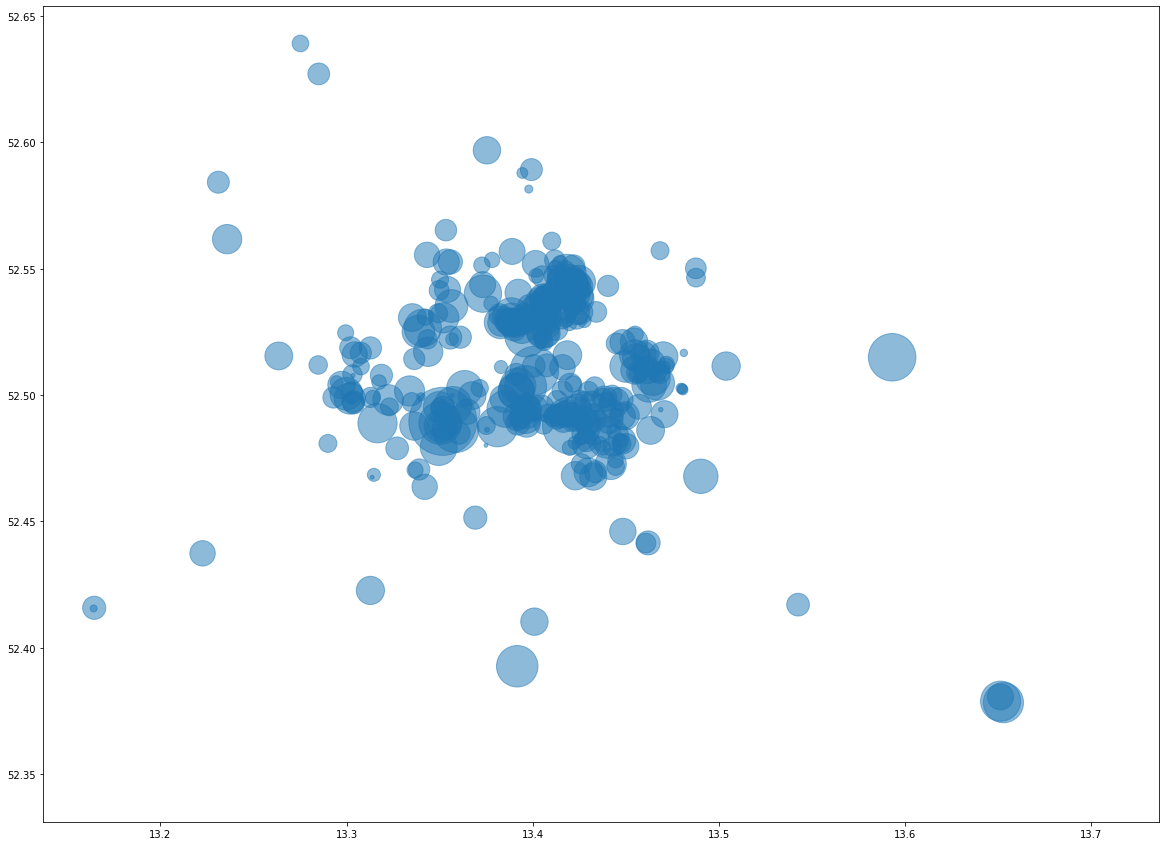

In [32]:
plt.figure(figsize=(20,15))
plt.scatter(x=list_sum['longitude'], y=list_sum['latitude'], alpha=0.5, s=list_sum['square_feet'] )

<AxesSubplot:>

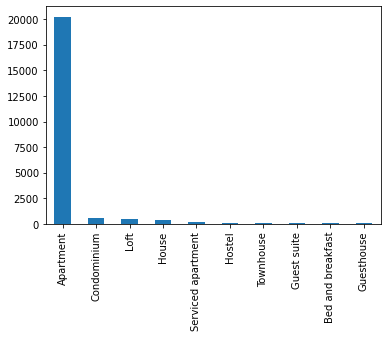

In [38]:
list_sum['property_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

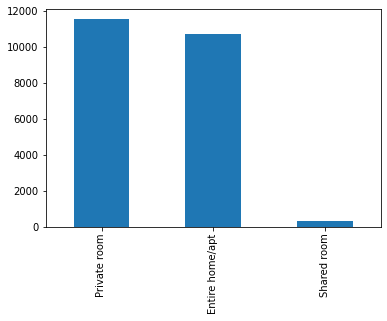

In [39]:
list_sum['room_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

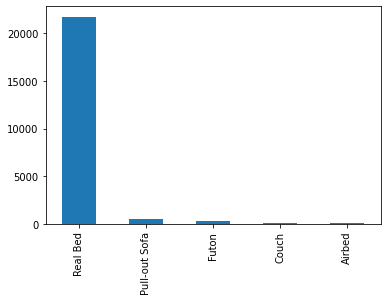

In [40]:
list_sum['bed_type'].value_counts(ascending=False)[:10].plot(kind='bar')

<AxesSubplot:>

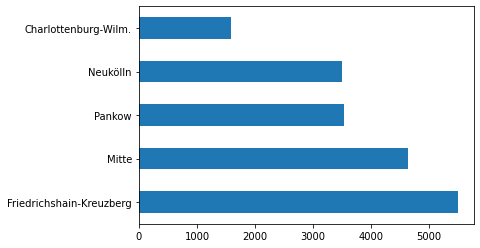

In [66]:
list_sum['neighbourhood_group_cleansed'].value_counts(ascending=False)[:5].plot(kind='barh')


In [69]:
list_FriedrichshainKreuzberg=list_sum[list_sum.neighbourhood_group_cleansed=='Friedrichshain-Kreuzberg']

<AxesSubplot:>

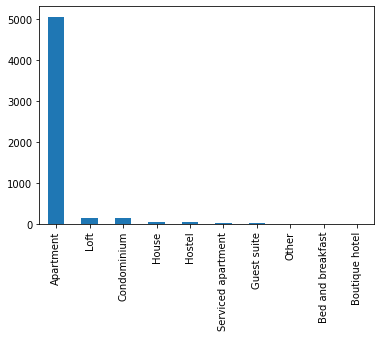

In [100]:
#The top 10 selected property types from Reinickendor neighborhood: 
list_FriedrichshainKreuzberg['property_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

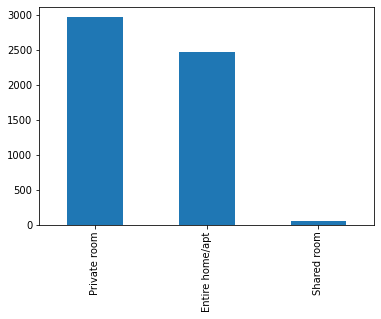

In [71]:
#The top 10 selected room types from Friedrichshain Kreuzberg neighborhood: 
list_FriedrichshainKreuzberg['room_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

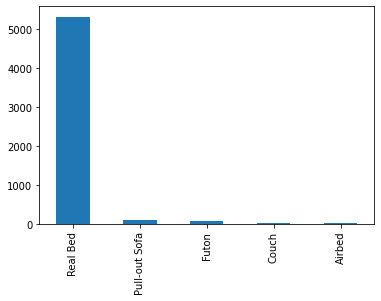

In [72]:
#The top 10 selected bed types from Friedrichshain Kreuzberg neighborhood: 
list_FriedrichshainKreuzberg['bed_type'].value_counts(ascending=False)[:10].plot(kind='bar')


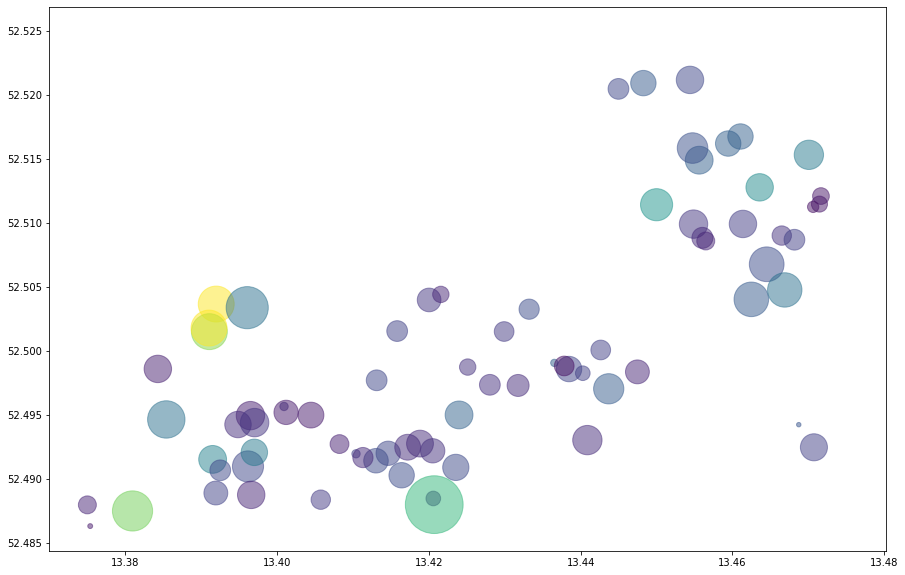

In [94]:
#Price(color) vs. region vs. square_feet(size):
plt.figure(figsize=(15,10))
plt.scatter(x=list_FriedrichshainKreuzberg['longitude'], y=list_FriedrichshainKreuzberg['latitude'], alpha=0.5, s=list_FriedrichshainKreuzberg['square_feet'],c=list_FriedrichshainKreuzberg['price'] )

In [ ]:
#In Friedrichshain Kreuzberg region,the more west-southern area, the larger the size of the room, and the higher the price. 

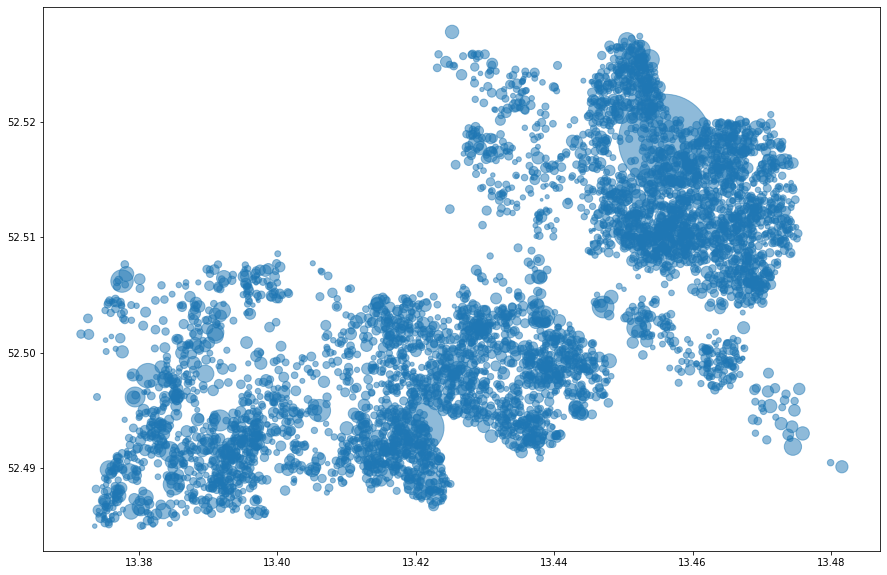

In [95]:
#Price(color) vs. region:
plt.figure(figsize=(15,10))
plt.scatter(x=list_FriedrichshainKreuzberg['longitude'], y=list_FriedrichshainKreuzberg['latitude'], alpha=0.5, s=list_FriedrichshainKreuzberg['price'] )

In [ ]:
#In Friedrichshain Kreuzberg region, not considering the size of the room, the highest price of the room appears in the east-northern area. 
#Most of the airbnb houses are booked in the east-northern and southern area.
#There is a gab between the east-northern and southern area, there might be a geographical reason, e.g. river.

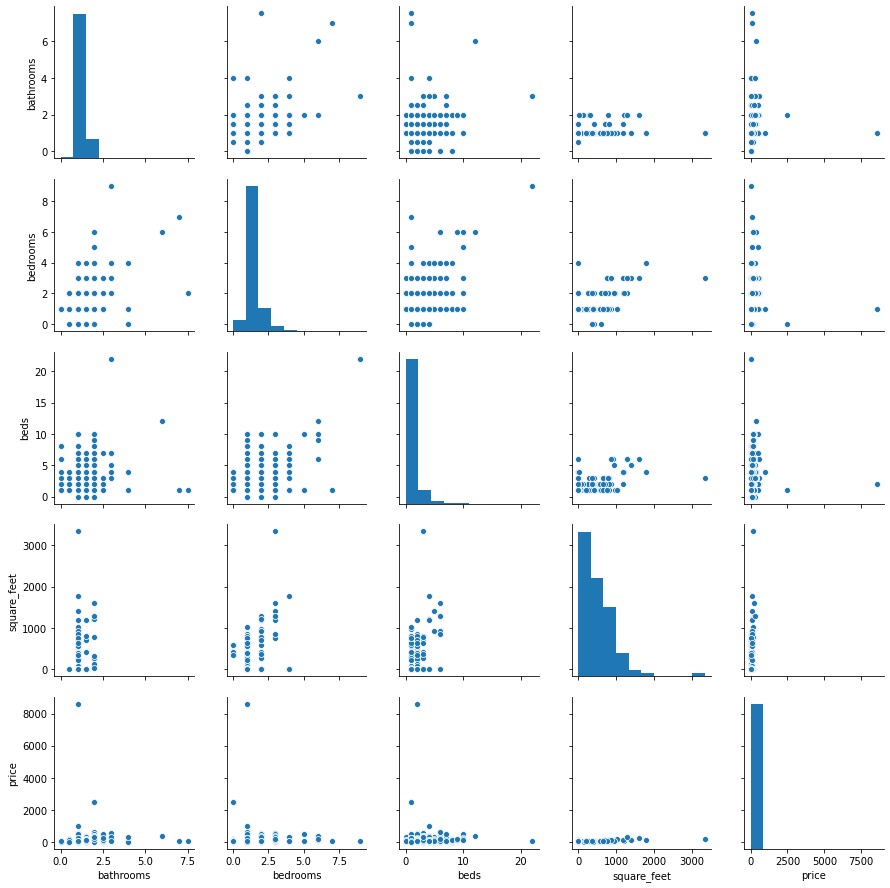

In [106]:
#correlation analysis among the number of bathrooms, bedrooms, beds, square_feet and price
sns.pairplot(list_FriedrichshainKreuzberg[['bathrooms','bedrooms', 'beds', 'square_feet','price']])

In [ ]:
#In Friedrichshain Kreuzberg area:
#The price is not sensitive to the number of bathrooms, bedrooms, beds or square feet.

In [76]:
list_Mitte=list_sum[list_sum.neighbourhood_group_cleansed=='Mitte']

<AxesSubplot:>

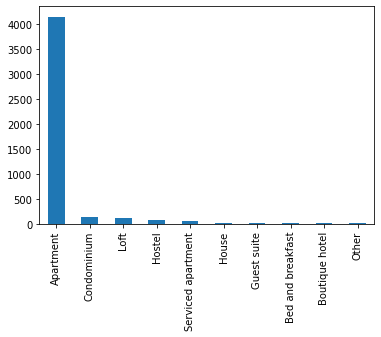

In [101]:
#The top 10 selected property types from Mitte neighborhood: 
list_Mitte['property_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

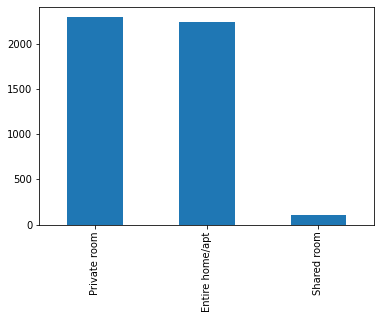

In [77]:
#The top 10 selected room types from Mitte neighborhood: 
list_Mitte['room_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

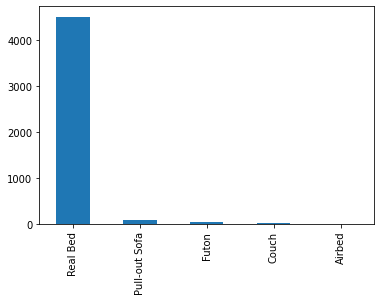

In [78]:
#The top 10 selected bed types from Mitte neighborhood: 
list_Mitte['bed_type'].value_counts(ascending=False)[:10].plot(kind='bar')


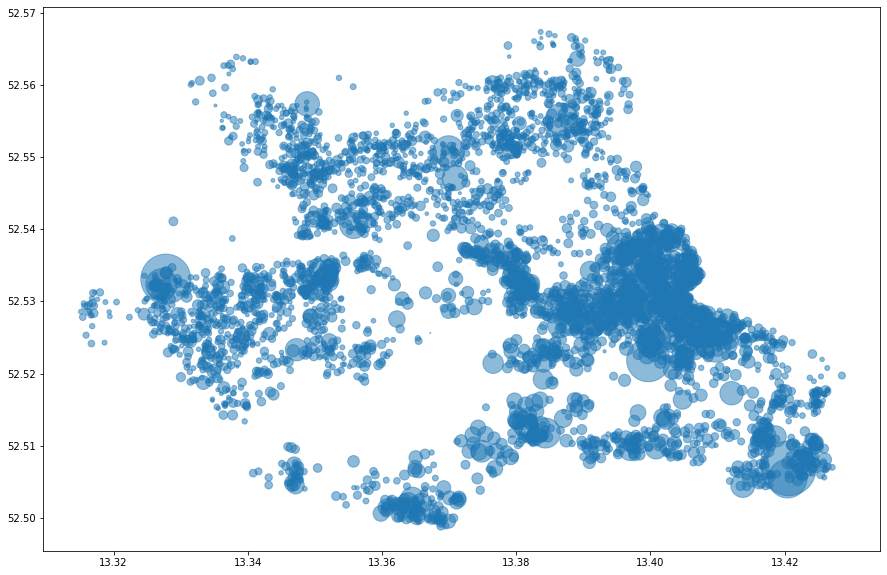

In [79]:
#Price(color) vs. region:
plt.figure(figsize=(15,10))
plt.scatter(x=list_Mitte['longitude'], y=list_Mitte['latitude'], alpha=0.5, s=list_Mitte['price'] )

In [ ]:
#In Mitte area:
#Most of the orders come from the eastern area.
#The high-price orders come from separate group in the region.
#The price in the southern area is more expensive than those from the north. 

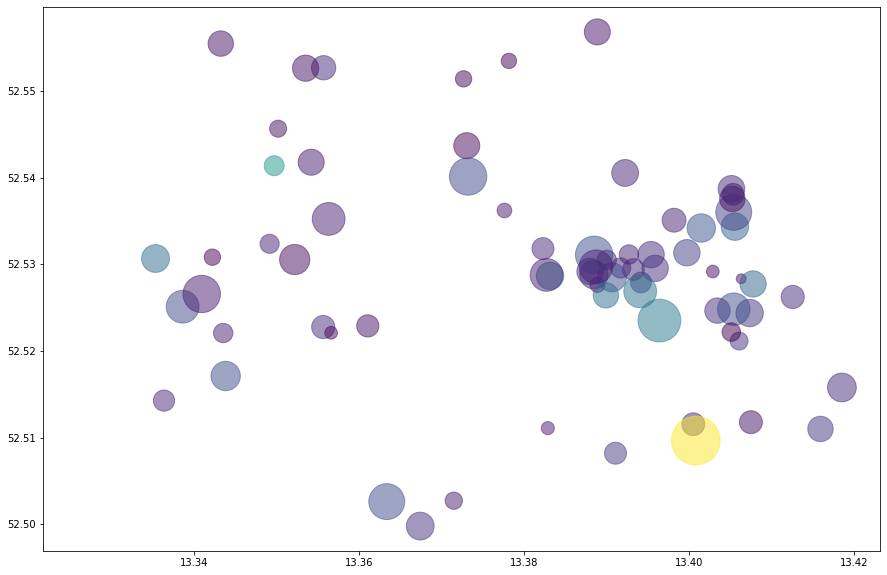

In [107]:
#Price(color) vs region vs square_feet :
plt.figure(figsize=(15,10))
plt.scatter(x=list_Mitte['longitude'], y=list_Mitte['latitude'], alpha=0.5, s=list_Mitte['square_feet'],c=list_Mitte['price'])

In [ ]:
#In Mitte area, the eastern the house, the larger the size, and the higher the price.

In [80]:
list_Pankow=list_sum[list_sum.neighbourhood_group_cleansed=='Pankow']

<AxesSubplot:>

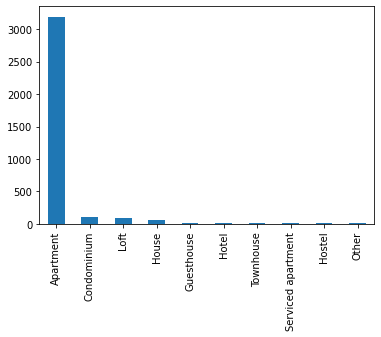

In [102]:
#The top 10 selected property types from Pankow neighborhood: 
list_Pankow['property_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

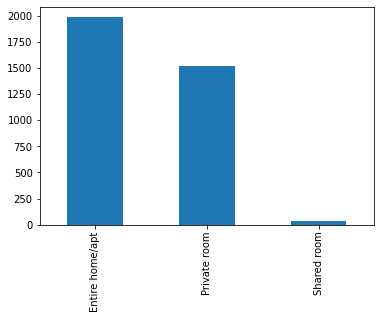

In [81]:
#The top 10 selected room types from Pankow neighborhood: 
list_Pankow['room_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

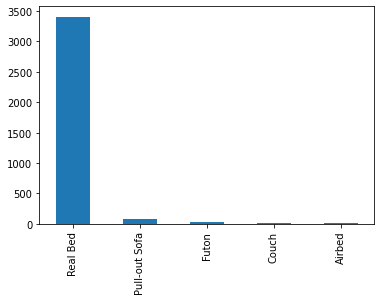

In [82]:
#The top 10 selected bed types from Pankow neighborhood: 
list_Pankow['bed_type'].value_counts(ascending=False)[:10].plot(kind='bar')


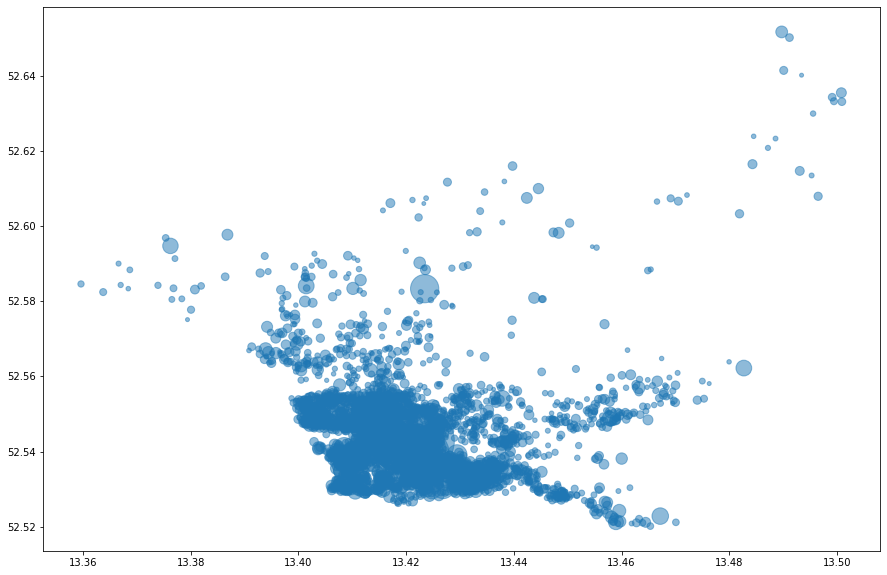

In [83]:
#Region vs price
plt.figure(figsize=(15,10))
plt.scatter(x=list_Pankow['longitude'], y=list_Pankow['latitude'], alpha=0.5, s=list_Pankow['price'] )

In [ ]:
#In Pankow area,
#Most of the airbnb orders come one one area, which is the southern area in the neighborhood.

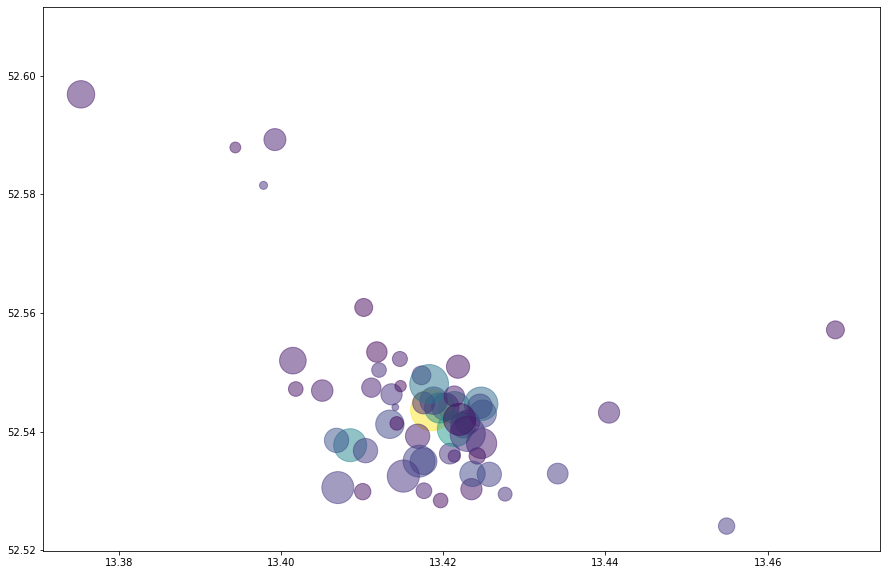

In [97]:
#region vs price vs size
plt.figure(figsize=(15,10))
plt.scatter(x=list_Pankow['longitude'], y=list_Pankow['latitude'], alpha=0.5, s=list_Pankow['square_feet'],c=list_Pankow['price'] )

In [ ]:
#In Mitte area,
#The high-price orders come from larger size of the room, in southern area.

In [85]:
list_Neukölln=list_sum[list_sum.neighbourhood_group_cleansed=='Neukölln']

<AxesSubplot:>

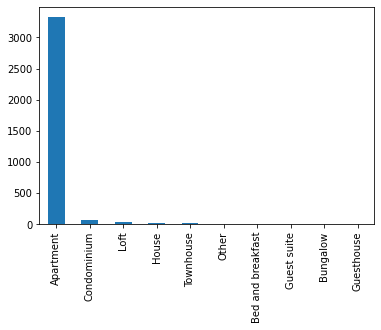

In [103]:
#The top 10 selected property types from Neukölln neighborhood: 
list_Neukölln['property_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

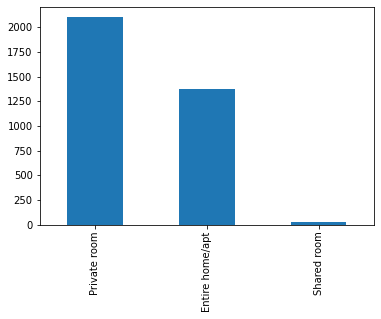

In [86]:
#The top 10 selected room types from Neukölln neighborhood: 
list_Neukölln['room_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

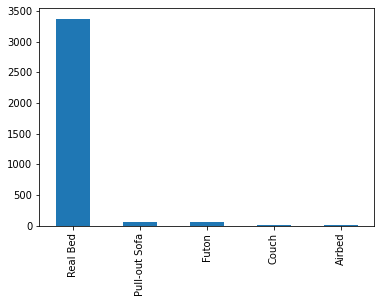

In [88]:
#The top 10 selected bed types from Neukölln neighborhood: 
list_Neukölln['bed_type'].value_counts(ascending=False)[:10].plot(kind='bar')


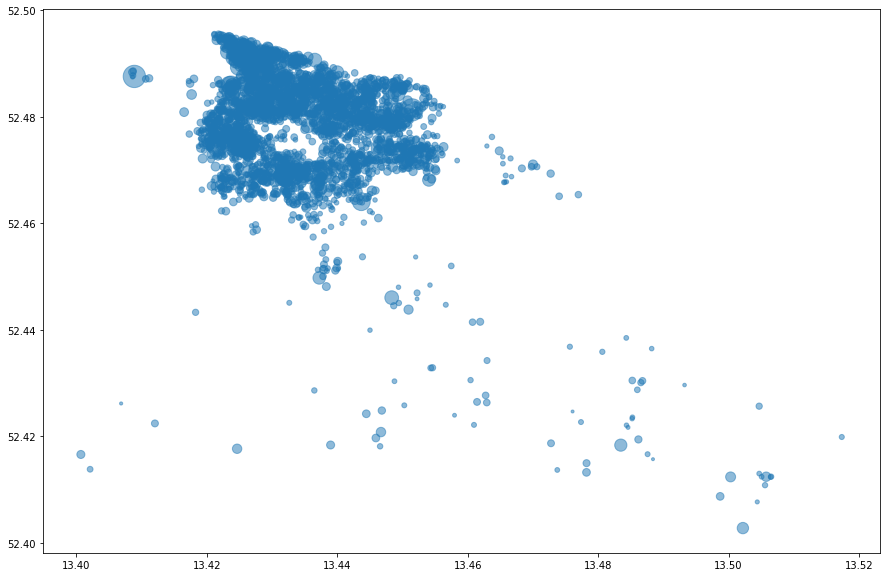

In [89]:
#region vs price
plt.figure(figsize=(15,10))
plt.scatter(x=list_Neukölln['longitude'], y=list_Neukölln['latitude'], alpha=0.5, s=list_Neukölln['price'] )

In [ ]:
#In Neukölln area, most of the orders come from the west-northern area.

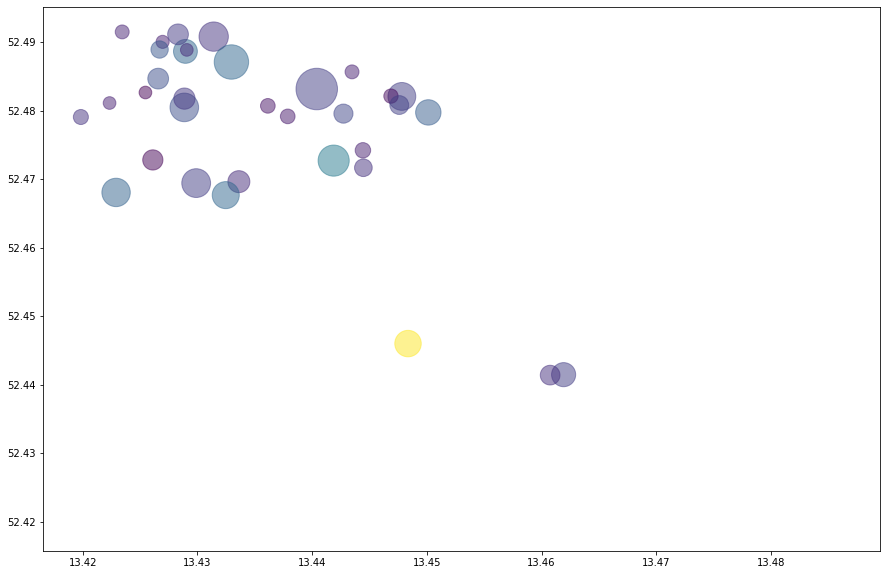

In [98]:
#region vs price vs size
plt.figure(figsize=(15,10))
plt.scatter(x=list_Neukölln['longitude'], y=list_Neukölln['latitude'], alpha=0.5, s=list_Neukölln['square_feet'],c=list_Neukölln['price'] )

In [ ]:
#In Neukölln area, the price and the room size are not sensitively correlate. 

In [90]:
list_CharlottenburgWilm=list_sum[list_sum.neighbourhood_group_cleansed=='Charlottenburg-Wilm.']

<AxesSubplot:>

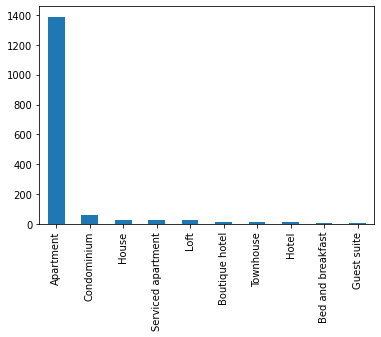

In [104]:
#The top 10 selected property types from CharlottenburgWilm neighborhood: 
list_CharlottenburgWilm['property_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

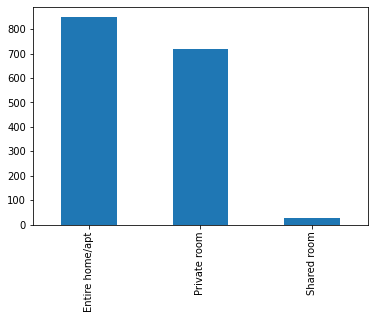

In [91]:
#The top 10 selected room types from CharlottenburgWilm neighborhood: 
list_CharlottenburgWilm['room_type'].value_counts(ascending=False)[:10].plot(kind='bar')


<AxesSubplot:>

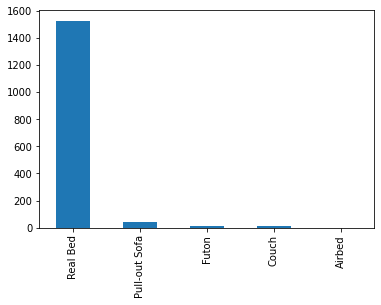

In [92]:
#The top 10 selected bed types from CharlottenburgWilm neighborhood: 
list_CharlottenburgWilm['bed_type'].value_counts(ascending=False)[:10].plot(kind='bar')


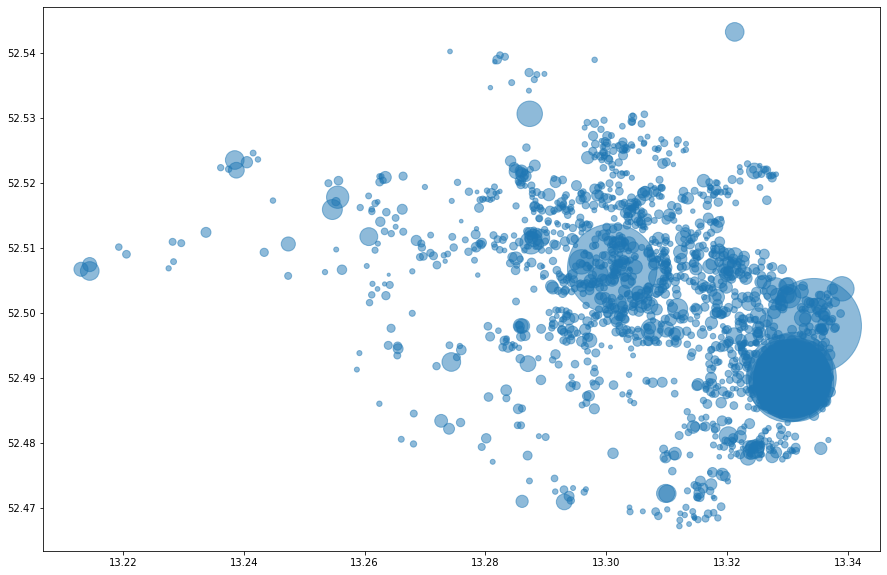

In [93]:
#region vs price
plt.figure(figsize=(15,10))
plt.scatter(x=list_CharlottenburgWilm['longitude'], y=list_CharlottenburgWilm['latitude'], alpha=0.5, s=list_CharlottenburgWilm['price'] )

In [ ]:
#In CharlottenburgWilm,
#most of the orders come from the eastern and east-southern parts, and the price in these two areas are larger.

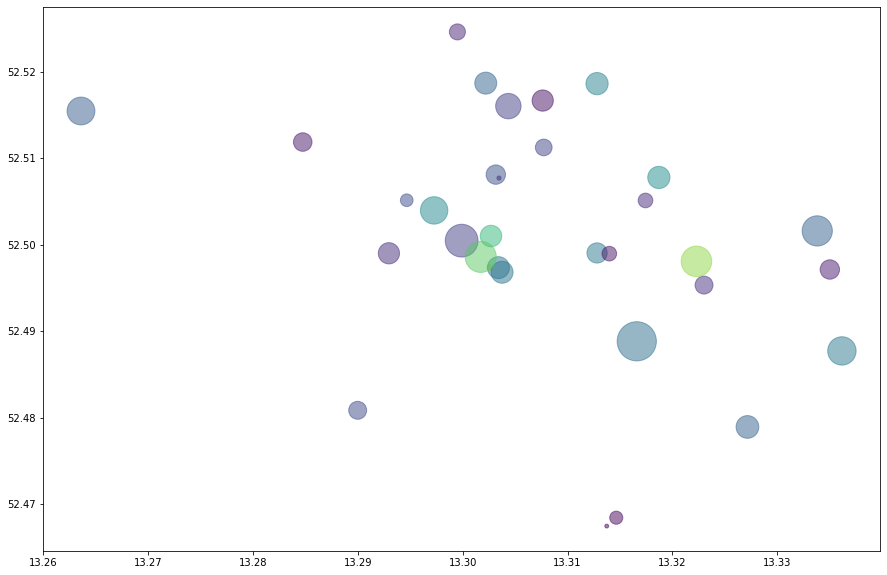

In [99]:
plt.figure(figsize=(15,10))
plt.scatter(x=list_CharlottenburgWilm['longitude'], y=list_CharlottenburgWilm['latitude'], alpha=0.5, s=list_CharlottenburgWilm['square_feet'],c=list_CharlottenburgWilm['price'] )

In [ ]:
#In CharlottenburgWilm, houses in the center and eastern area are larger, but the price are not that sensitive to the size of the room.

In [7]:
pd.read_csv('neighbourhoods.csv')

,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord
2,Charlottenburg-Wilm.,Düsseldorfer Straße
3,Charlottenburg-Wilm.,Forst Grunewald
4,Charlottenburg-Wilm.,Grunewald
...,...,...
134,Treptow - Köpenick,Oberschöneweide
135,Treptow - Köpenick,Plänterwald
136,Treptow - Köpenick,Rahnsdorf/Hessenwinkel
137,Treptow - Köpenick,Schmöckwitz/Karolinenhof/Rauchfangswerder


In [8]:
neighbor=pd.read_csv('neighbourhoods.csv')

In [9]:
neighbor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
neighbourhood_group    138 non-null object
neighbourhood          138 non-null object
dtypes: object(2)
memory usage: 2.3+ KB


In [25]:
neighbor.describe()

,neighbourhood_group,neighbourhood
count,138,138
unique,12,138
top,Treptow - Köpenick,Brunnenstr. Nord
freq,20,1


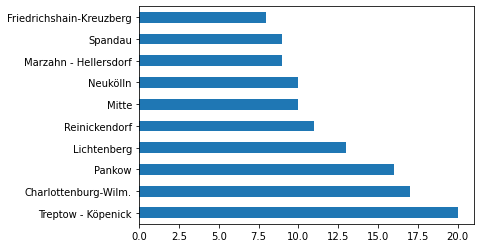

In [87]:
neighbor['neighbourhood_group'].value_counts(ascending=False)[:10].plot(kind='barh')


List out the most 10 popular neighborhood group chosen by customers.

In [26]:
pd.read_csv('/reviews.csv')


,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15
2,2015,2016-04-26
3,2015,2016-05-10
4,2015,2016-05-14
...,...,...
401958,29784461,2018-11-06
401959,29792124,2018-11-05
401960,29817383,2018-11-07
401961,29849565,2018-11-07


In [27]:
review=pd.read_csv('/reviews.csv')

In [28]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  401963 non-null  int64 
 1   date        401963 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [29]:
review.describe()

,listing_id
count,4.019630e+05
mean,1.027382e+07
std,8.097068e+06
min,2.015000e+03
25%,2.421223e+06
50%,9.085319e+06
75%,1.710636e+07
max,2.984956e+07


In [95]:
review['date'].value_counts(ascending=False)[:50]


2017-05-28    1234
2018-05-21    1174
2018-09-30    1134
2018-09-16    1129
2018-09-02    1120
2018-05-13    1087
2018-09-10    1085
2018-09-17    1064
2018-10-14    1059
2018-09-23    1040
2018-09-09    1001
2018-10-07     982
2018-05-20     972
2018-08-26     971
2018-08-12     912
2018-10-21     901
2018-09-21     898
2018-04-02     891
2018-06-10     873
2018-06-03     872
2018-07-01     870
2018-03-11     855
2018-01-02     847
2018-08-19     841
2018-09-18     816
2018-07-08     815
2018-07-29     812
2018-06-24     812
2018-06-17     800
2018-07-22     797
2018-09-24     790
2018-09-03     790
2018-08-27     784
2017-09-24     779
2017-09-11     776
2018-08-13     776
2018-07-15     775
2018-05-06     773
2018-09-20     772
2018-04-30     765
2018-05-27     749
2017-09-03     747
2018-05-01     746
2018-04-22     745
2018-08-05     744
2018-10-15     739
2018-10-12     738
2018-10-08     737
2018-10-01     735
2018-01-01     731
Name: date, dtype: int64

In [96]:
review['date'].value_counts(ascending=True)[:20]


2011-02-09    1
2012-01-12    1
2011-03-12    1
2011-05-24    1
2015-11-30    1
2010-10-18    1
2011-08-17    1
2011-06-19    1
2012-02-08    1
2011-09-11    1
2010-07-24    1
2011-01-28    1
2011-03-16    1
2011-01-30    1
2010-11-29    1
2010-11-04    1
2010-09-21    1
2011-05-31    1
2013-02-02    1
2010-07-28    1
Name: date, dtype: int64

List out the review dates depending the number of review in descending order. There are a 1000+ records of review in 2018. 

List out the review dates depending the number of review in ascending order.We could se that from 2010-2012, the review amount is few. This might be the airbnb website at that time is not that popular used by customers, or the website review function is not frequently used by customers. 

But luckily we realize that customers do use the review function more frequently than before. 

In [5]:
pd.read_csv('reviews_summary.csv')

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."
...,...,...,...,...,...,...
401958,29784461,345904235,2018-11-06,160580302,Michelle,The host canceled this reservation 269 days be...
401959,29792124,345428291,2018-11-05,117705698,Kevin,The host canceled this reservation 5 days befo...
401960,29817383,346045092,2018-11-07,20344466,Johan,The host canceled this reservation 50 days bef...
401961,29849565,346027793,2018-11-07,114291292,Matthias,The host canceled this reservation 23 days bef...


In [6]:
review_sum=pd.read_csv('reviews_summary.csv')

In [7]:
review_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 6 columns):
listing_id       401963 non-null int64
id               401963 non-null int64
date             401963 non-null object
reviewer_id      401963 non-null int64
reviewer_name    401963 non-null object
comments         401467 non-null object
dtypes: int64(3), object(3)
memory usage: 18.4+ MB


In [8]:
pip install -U textblob


SyntaxError: invalid syntax (<ipython-input-8-672d51ce94c2>, line 1)

In [15]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [16]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

review_sum['polarity'] = review_sum['comments'].apply(sentiment_calc)

In [17]:
review_sum.head()
#TextBlob’s output for a polarity task is a float within the range [-1.0, 1.0] 
#where -1.0 is a negative polarity and 1.0 is positive. 
#This score can also be equal to 0, which stands for a neutral evaluation of a statement as it doesn’t contain any words from the training set.


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...,0.027083
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,0.676875
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...,0.000000
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ...",0.800000
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden...",0.000000


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


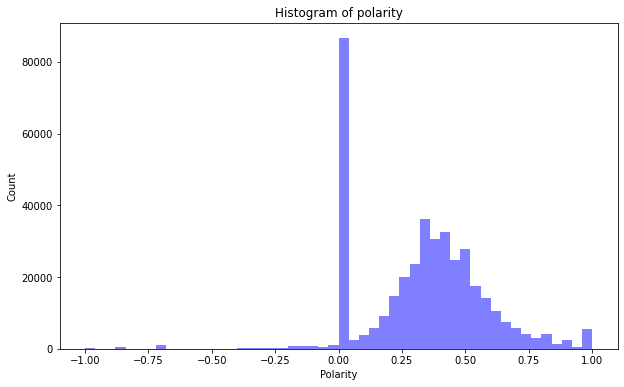

In [18]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(review_sum.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();
#Most polarity scores are above zero, 
#meaning most of the reviews are positive sentiment in the data

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='listing_id', y='polarity', data=review_sum)
plt.show();

In [19]:
review_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 7 columns):
listing_id       401963 non-null int64
id               401963 non-null int64
date             401963 non-null object
reviewer_id      401963 non-null int64
reviewer_name    401963 non-null object
comments         401467 non-null object
polarity         401467 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 21.5+ MB


In [29]:
review_sum1 = review_sum.groupby(['listing_id'])['polarity'].mean().reset_index(name="polarity")
review_sum1.head()
#group the data based on the 'listing_id' and calculate the mean polarity of each

,listing_id,polarity
0,2015,0.353835
1,2695,0.391583
2,3176,0.381437
3,3309,0.316826
4,7071,0.392842


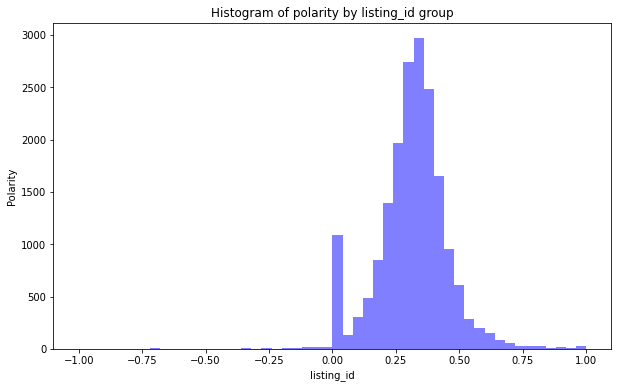

In [31]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(review_sum1.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('listing_id')
plt.ylabel('Polarity')
plt.title('Histogram of polarity by listing_id group')
plt.show();

In [ ]:
#the graph above is a histogram of polarity from each listing_id
#we can see that most of the listing_id would comment with more positive words 
#the neural comments are given less 

In [101]:
review_sum['reviewer_id'] = review_sum['reviewer_id'].astype(str)
review_sum['reviewer_id'].value_counts(ascending=False)[:10]


47369497.0     30
119795263.0    27
42972432.0     24
17543627.0     20
15973922.0     19
22149546.0     19
3029019.0      18
6069041.0      18
28687436.0     18
6016783.0      18
Name: reviewer_id, dtype: int64

List out the top 10 reviewer_ID depending on the review amounts, and we could find out the reviewer who commented more frequently. 